The overall purpose of this project is to gather data on the amount of alcohol people over the age of 15 consumed in each country in the world, compare correlations between them, and provide statistical analysis. The data is broken down by total servings per person of beer, wine, and spirit consumed in the year 2011.

In [49]:
#graphical plotting tools 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import ttest_ind
%matplotlib inline

In [3]:
#Alcohol data set. This shows average alcohol consumption per capita for those age 15 and over in each country.

df = pd.read_csv("/Users/elijahwoolford/Desktop/python /drinks.csv")
#df


In [10]:
#Data set to gather every country's continent.

df2 = pd.read_csv("/Users/elijahwoolford/Desktop/python /countries.csv")
#df2

In [5]:
#Data set to gather country's average temperature in degrees C for the year 2011.

df_temp = pd.read_csv("/Users/elijahwoolford/Desktop/python /average_temp_per_country.csv")
#df_temp.sort_values(["Country Name"])

In [37]:
# This parses through the data sets and puts a country's index with the corresponding continent. It also creates a new
# data frame combining country with continent, beer, wine, and sprit averages. 

dic = {}
country = []
continent = []
beer = []
wine = []
spirit = []
temp = []
for i in range(len(df["country"])):
    for j in range(len(df2["name"])):
        if df["country"][i] == df2["name"][j]:
            dic[i] = df2["region"][j]
dic[184] = "Americas"
dic[182] = "Europe"

for key in dic:
    country.append(df.loc[key, "country"])
    continent.append(dic[key])
    beer.append(df.loc[key, "beer_servings"])
    wine.append(df.loc[key, "wine_servings"])
    spirit.append(df.loc[key, "spirit_servings"])
    temp.append(df_temp.loc[key, "Average yearly temperature"])
    
df3 = pd.DataFrame()
df3["country"] = country
df3["continent"] = continent
df3["beer"] = beer
df3["wine"] = wine
df3["spirit"] = spirit
df3["avg_temp"] = temp
#df3

In [38]:
# Takes new data frame and groups the averages of beer, wine, and spirit by continent 

average = df3.groupby("continent").mean()
#average

In [39]:
# Takes new data frame and groups the standard deviations of beer, wine, and spirit by continent 
std = df3.groupby("continent").std()
#std

In [45]:
# Sample data

euro_beer = []
america_beer = []
euro_wine = []
america_wine = []
euro_sample = ["Denmark", "Finland", "Iceland", "Ireland", "Estonia", "Latvia", "Lithuania", "Norway", "Romania", "Sweden", "Switzerland", "France", "Germany", "Ukraine", "Slovenia"]
america_sample = ["USA", "Mexico", "Canada", "Argentina", "Ecuador", "Bahamas", "Brazil", "Cuba", "El Salvador", "Guyana","Honduras", "Jamaica", "Peru", "Nicaragua", "Haiti"]

for country in euro_sample:
    for i in range(len(df3["country"])):
        if country == df3["country"][i]:
            euro_beer.append(df3["beer"][i])
            euro_wine.append(df3["wine"][i])
            
for country in america_sample:
    for i in range(len(df3["country"])):
        if country == df3["country"][i]:
            america_beer.append(df3["beer"][i])
            america_wine.append(df3["wine"][i])
            
sample_df_euro = pd.DataFrame()
sample_df_euro["country"] = euro_sample
sample_df_euro["beer"] = euro_beer
sample_df_euro["wine"] = euro_wine

sample_df_america = pd.DataFrame()
sample_df_america["country"] = america_sample
sample_df_america["beer"] = america_beer
sample_df_america["wine"] = america_wine

# Mean and standard deviations of each sample
euro_beer_average = sample_df_euro["beer"].mean()
euro_wine_average = sample_df_euro["wine"].mean()
euro_beer_std = sample_df_euro["beer"].std()
euro_wine_std = sample_df_euro["wine"].std()

america_beer_average = sample_df_america["beer"].mean()
america_wine_average = sample_df_america["wine"].mean()
america_beer_std = sample_df_america["beer"].std()
america_wine_std = sample_df_america["wine"].std()

diff_beer = euro_beer_average - america_beer_average
diff_wine = euro_wine_average - america_wine_std
print(diff_beer)
print(diff_wine)

103.53333333333333
101.07059392183415


In [48]:
# Standard Error for sample beer
size = np.array([15,15])
sd = np.array([america_beer_std, euro_beer_std])
diff_beer_se = ((sum(sd ** 2)/size)) ** 0.5
print(diff_beer_se)

[27.09047745 27.09047745]


In [51]:
# Standard Error for sample wine
size = np.array([15,15])
sd = np.array([america_wine_std, euro_wine_std])
diff_wine_se = ((sum(sd ** 2)/size)) ** 0.5
print(diff_wine_se)

[30.3550524 30.3550524]


In [50]:
#T-value and P-value for the sample beer
print(ttest_ind(euro_beer, america_beer, equal_var=False))

Ttest_indResult(statistic=3.8217611165984855, pvalue=0.0007016088252482482)


In [52]:
#T-value and P-value for the sample wine
print(ttest_ind(euro_wine, america_wine, equal_var=False))

Ttest_indResult(statistic=4.175032599302524, pvalue=0.0003663004019304313)


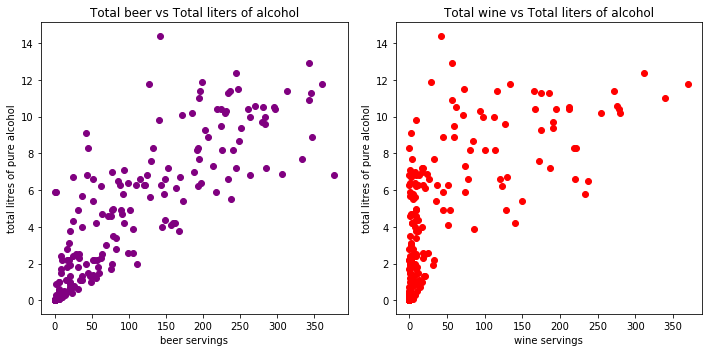

In [8]:
# Two scatterplots showing correlation between type of alcohol and total alcohol consumed. 

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x=df["beer_servings"], 
            y=df["total_litres_of_pure_alcohol"],
            color="purple")
plt.xlabel("beer servings")
plt.ylabel("total litres of pure alcohol")
plt.title("Total beer vs Total liters of alcohol")

plt.subplot(1,2,2)
plt.scatter(x=df["wine_servings"],
            y=df["total_litres_of_pure_alcohol"],
            color="red")
plt.xlabel("wine servings")
plt.ylabel("total litres of pure alcohol")
plt.title("Total wine vs Total liters of alcohol")

plt.tight_layout()
plt.show()


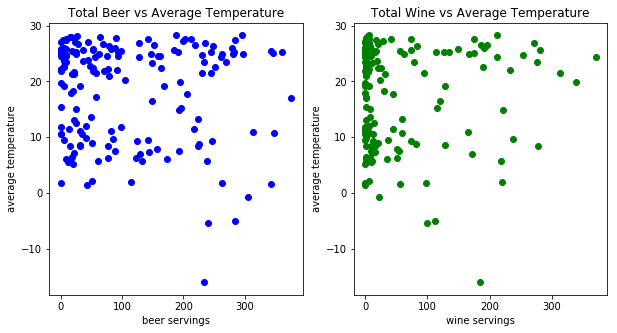

In [86]:
#Two scatterplots showing a relationship between type of alcohol and average temperature. 

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x=df3["beer"],
            y=df3["avg_temp"],
            color="blue")
plt.xlabel("beer servings")
plt.ylabel("average temperature")
plt.title("Total Beer vs Average Temperature")

plt.subplot(1,2,2)
plt.scatter(x=df3["wine"],
            y=df3["avg_temp"],
            color="green")
plt.xlabel("wine servings")
plt.ylabel("average temperature")
plt.title("Total Wine vs Average Temperature")

plt.show()

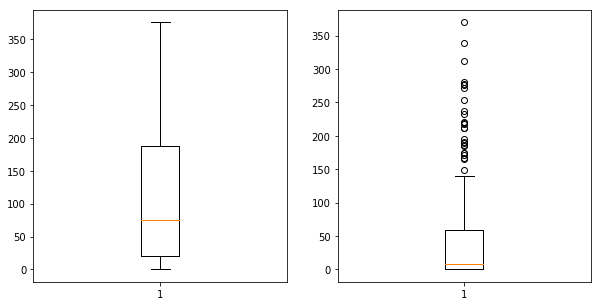

In [9]:
# Two boxplots that show the ranges of beer and wine servings. 

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.boxplot(df["beer_servings"])

plt.subplot(1,2,2)
plt.boxplot(df["wine_servings"])

plt.show()

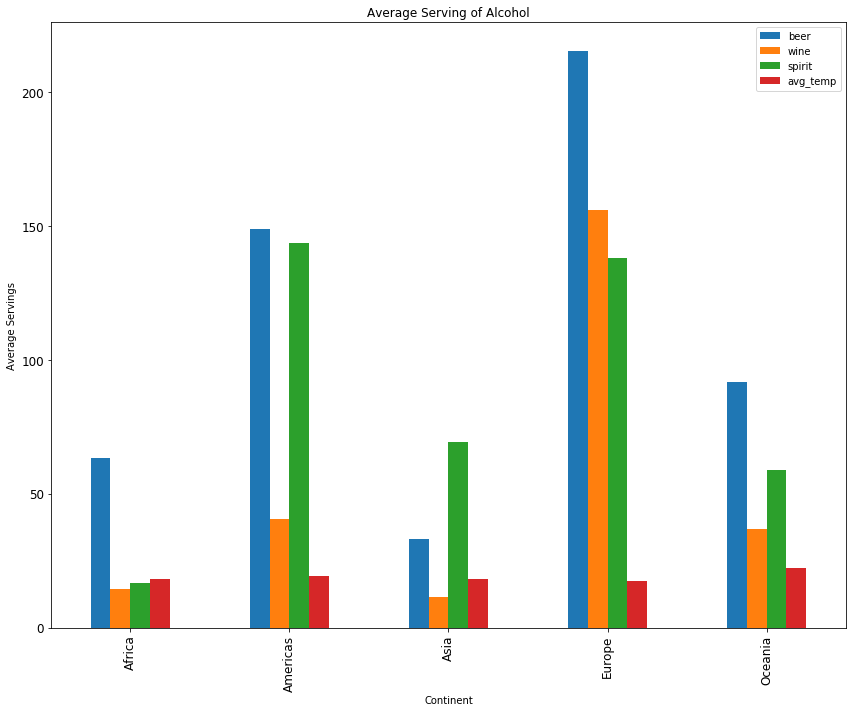

In [87]:
#Bar graph that show average beer, wine, and sprits consumed per continent.

ax = average.plot(kind="bar", figsize=(12,10), legend=True, fontsize=12)
ax.set_xlabel("Continent")
ax.set_ylabel("Average Servings")
plt.title("Average Serving of Alcohol")
plt.tight_layout()
plt.show()

We can conclude that overall people in Europe drink the most alcohol in the world. Also, people tend to drink more beer overall in the world than the other types of alcohol.